In [28]:
import cv2

def capture_image():
    # 웹캠에 접근
    cap = cv2.VideoCapture(2)

    if not cap.isOpened():
        print("웹캠을 열 수 없습니다.")
        return

    while True:
        # 프레임 읽기
        ret, frame = cap.read()

        # 프레임 표시
        cv2.imshow('Webcam', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # 's' 키를 누르면 이미지 저장
        elif cv2.waitKey(1) & 0xFF == ord('s'):
            cv2.imwrite('captured_image1.jpg', frame)
            print("이미지를 저장했습니다.")

    # 종료 시 리소스 해제
    cap.release()
    cv2.destroyAllWindows()

# 이미지 캡처 함수 호출
capture_image()


이미지를 저장했습니다.


모델 예측 1

In [31]:
import cv2
import numpy as np
import tensorflow as tf

# 모델 로드
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/cnn1_model.h5')

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (32, 32))
    normalized_image = resized_image / 255.0
    return normalized_image


test_image_path = '/home/addinedu/dev_ws/DL/captured_image.jpg'

# 이미지 전처리
test_image = preprocess_image(test_image_path)

# 이미지를 배치 형태로 변환
test_image = np.expand_dims(test_image, axis=0)

# 예측
prediction = model.predict(test_image)

# 예측 결과 출력
print("Predicted class probabilities:", prediction)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted class probabilities: [[1.000000e+00 3.316801e-16]]
Predicted class: 0


모델 예측2


In [33]:
import cv2
import numpy as np
import tensorflow as tf

# 모델 로드
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/cnn1_model.h5')

def load_and_preprocess_image(image_path, grayscale=True, threshold=True):
    image = cv2.imread(image_path)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 그레이 스케일 변환
    if threshold:
        _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)  # 이진화
    image = cv2.resize(image, (32, 32))  # 이미지 크기를 32x32로 조정
    image = image / 255.0  # 이미지를 0과 1 사이의 값으로 정규화
    return image.reshape((32, 32, 1 if grayscale else 3)) if not threshold else image.reshape((32, 32, 1))


test_image_path = '/home/addinedu/dev_ws/DL/captured_image1.jpg'

# 이미지 전처리
test_image = preprocess_image(test_image_path)

# 이미지를 배치 형태로 변환
test_image = np.expand_dims(test_image, axis=0)

# 예측
prediction = model.predict(test_image)

# 예측 결과 출력
print("Predicted class probabilities:", prediction)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted class probabilities: [[5.97e-43 1.00e+00]]
Predicted class: 1


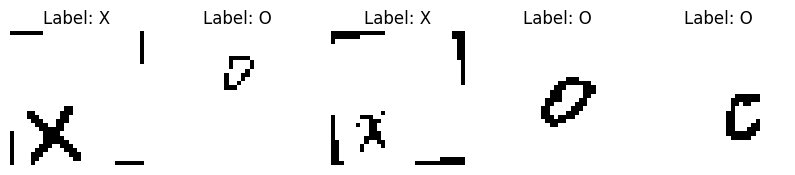

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os

# 데이터 경로
X_image_folder = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000"
X_label_csv_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/X2_labels.csv"
O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000.csv"

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(image_path, grayscale=True, threshold=True):
    image = cv2.imread(image_path)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 그레이 스케일 변환
    if threshold:
        _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)  # 이진화
    image = cv2.resize(image, (32, 32))  # 이미지 크기를 32x32로 조정
    image = image / 255.0  # 이미지를 0과 1 사이의 값으로 정규화
    return image.reshape((32, 32, 1 if grayscale else 3)) if not threshold else image.reshape((32, 32, 1))


# 데이터셋 생성 함수
def create_dataset(image_folder, label_csv_path, grayscale=True, threshold=True):
    # 라벨 CSV 파일 로드
    label_df = pd.read_csv(label_csv_path)
    
    images = []
    labels = []

    # 각 이미지에 대해 라벨을 매핑하여 이미지와 라벨 데이터 생성
    for index, row in label_df.iterrows():
        image_path = os.path.join(image_folder, row["Image_Path"])
        label = row["Label"]
        image = load_and_preprocess_image(image_path, grayscale, threshold)
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

# X 데이터셋 생성
X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
X_labels = np.zeros(len(X_images), dtype=int)  # X 이미지는 0으로 라벨링

# O 데이터셋 생성
O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
O_labels = np.ones(len(O_images), dtype=int)  # O 이미지는 1로 라벨링

# 이미지 데이터와 라벨 데이터를 합치기
images = np.concatenate((X_images, O_images), axis=0)
labels = np.concatenate((X_labels, O_labels), axis=0)

# 이미지 데이터와 라벨 데이터를 훈련 및 검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(images, labels, shuffle=True,test_size=0.2, random_state=13)

# 몇 장의 이미지를 확인할지 정의
num_images_to_visualize = 5

# 플로팅
plt.figure(figsize=(10, 5))
for i in range(num_images_to_visualize):
    # 랜덤한 인덱스 선택
    idx = np.random.randint(0, len(images))
    
    # 이미지와 라벨 가져오기
    image = images[idx]
    label = "X" if labels[idx] == 0 else "O"
    
    # 이미지 플로팅
    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(image.squeeze(), cmap='gray')  # 1채널인 경우에는 squeeze
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os

# 데이터 경로
X_image_folder = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000"
X_label_csv_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/X2_labels.csv"
O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000.csv"

def load_and_preprocess_image(image_path, grayscale=True, threshold=True):
    image = cv2.imread(image_path)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 그레이 스케일 변환
    if threshold:
        _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)  # 이진화
    image = cv2.resize(image, (32, 32))  # 이미지 크기를 32x32로 조정
    image = image / 255.0  # 이미지를 0과 1 사이의 값으로 정규화
    return image.reshape((32, 32, 1 if grayscale else 3)) if not threshold else image.reshape((32, 32, 1))

# 데이터셋 생성 함수
def create_dataset(image_folder, label_csv_path, grayscale=True, threshold=True):
    # 라벨 CSV 파일 로드
    label_df = pd.read_csv(label_csv_path)
    
    images = []
    labels = []

    # 각 이미지에 대해 라벨을 매핑하여 이미지와 라벨 데이터 생성
    for index, row in label_df.iterrows():
        image_path = os.path.join(image_folder, row["Image_Path"])
        label = row["Label"]
        image = load_and_preprocess_image(image_path, grayscale, threshold)
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

# X 데이터셋 생성
X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
X_labels = np.zeros(len(X_images), dtype=int)  # X 이미지는 0으로 라벨링

# O 데이터셋 생성
O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
O_labels = np.ones(len(O_images), dtype=int)  # O 이미지는 1로 라벨링

# 이미지 데이터와 라벨 데이터를 합치기
images = np.concatenate((X_images, O_images), axis=0)
labels = np.concatenate((X_labels, O_labels), axis=0)

# 이미지 데이터와 라벨 데이터를 훈련 및 검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(images, labels, shuffle=True,test_size=0.2, random_state=13)

# 클래스 개수 계산
num_classes = len(np.unique(X_labels))

# CNN 모델 생성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9678 - loss: 0.0846 - val_accuracy: 1.0000 - val_loss: 5.9977e-04
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 7.1174e-04 - val_accuracy: 1.0000 - val_loss: 2.7295e-04
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.3128e-05 - val_accuracy: 1.0000 - val_loss: 2.1814e-06
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4516e-05 - val_accuracy: 1.0000 - val_loss: 1.7432e-06
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.2261e-06 - val_accuracy: 1.0000 - val_loss: 6.0967e-07
Epoch 6/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.5726e-07 - val_accuracy: 1.0000 - val_loss: 1.7747e-07
Epoch 7/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 6.6406e-07 - val_accuracy: 1.0000 - val_loss: 3.3734e-07
Epoch 8/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

In [35]:
# 다른 디렉토리에 훈련된 모델 저장
model.save("/home/addinedu/dev_ws/DL/cnn2_model.h5")

In [36]:
import cv2
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/cnn2_model.h5')  # 모델 파일 경로 지정

def nothing(x):
    pass
cap = cv2.VideoCapture(2)

#cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
#cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

cv2.namedWindow("Trackbars")

cv2.createTrackbar("Min Radius", "Trackbars", 16, 30, nothing)
cv2.createTrackbar("Max Radius", "Trackbars", 22, 80, nothing)

def preprocess_image(img):
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    img = img.astype("float32") / 255.0
    return img



if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            min_radius = cv2.getTrackbarPos("Min Radius", "Trackbars")
            max_radius = cv2.getTrackbarPos("Max Radius", "Trackbars")
            
            g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # thr, bin_img = cv2.threshold(g_img, 110, 255, cv2.THRESH_BINARY_INV)
            thr, bin_img = cv2.threshold(g_img, 110, 255, cv2.THRESH_BINARY)
            
            contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, 
                                                   cv2.CHAIN_APPROX_SIMPLE)
            digits = []
            #number_counts = {}
            try:
                for contour in contours:
                    (x, y), radius = cv2.minEnclosingCircle(contour)
                    if 20 < radius < 200:
                        xs, xe = int(x-radius), int(x+radius)
                        ys, ye = int(y-radius), int(y+radius)
                        cv2.rectangle(bin_img, (xs, ys), (xe, ye), (200, 0, 0), 1)
                        roi = bin_img[ys:ye, xs:xe]
                        
                        roi = cv2.resize(roi, (32, 32), interpolation=cv2.INTER_AREA)
                        roi = roi.astype("float32") / 255.0
                        roi = np.expand_dims(roi, axis=0)
                        
                        # PyTorch 텐서로 변환
                        processed_roi = preprocess_image(roi)
                        processed_roi = np.expand_dims(processed_roi, axis=0)
                    
                        # 모델을 사용하여 예측 진행
                        prediction = model.predict(processed_roi)
                        num = np.argmax(prediction)
                        
                        cv2.putText(bin_img, str(num), (xs, ys), cv2.FONT_HERSHEY_PLAIN, 2, (200, 0, 0))
            
            except Exception as e:
                pass

            cv2.imshow("Video Capture", bin_img)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            print("No Frame...")
            break
else:
    print("Camera not opened...")
cap.release()
cv2.destroyAllWindows() 

flatten>> dense

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os

X_image_folder = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000"
X_label_csv_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/X2_labels.csv"
O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000.csv"

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    image = cv2.resize(image, (32, 32))  
    image = image / 255.0  
    return image


def create_dataset(image_folder, label_csv_path):
    
    label_df = pd.read_csv(label_csv_path)
    
    images = []
    labels = []

    for index, row in label_df.iterrows():
        image_path = os.path.join(image_folder, row["Image_Path"])
        label = row["Label"]
        image = load_and_preprocess_image(image_path)
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
X_labels = np.zeros(len(X_images), dtype=int)  # X 이미지는 0으로 라벨링

O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
O_labels = np.ones(len(O_images), dtype=int)  # O 이미지는 1로 라벨링

images = np.concatenate((X_images, O_images), axis=0)
labels = np.concatenate((X_labels, O_labels), axis=0)


X_train, X_val, y_train, y_val = train_test_split(images, labels, shuffle=True, test_size=0.2, random_state=13)

num_classes = len(np.unique(labels))

def initialize_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



model = initialize_model()


history = model.fit(X_train, y_train, epochs=9, validation_data=(X_val, y_val))


/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8972 - loss: 1.2664 - val_accuracy: 0.9993 - val_loss: 0.0019
Epoch 2/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9730 - loss: 0.0963 - val_accuracy: 0.9855 - val_loss: 0.2106
Epoch 3/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9977 - loss: 0.0131 - val_accuracy: 0.9995 - val_loss: 9.4490e-04
Epoch 4/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0153 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 5/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9941 - val_loss: 0.0253
Epoch 6/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0362 - val_accuracy: 0.9995 - val_loss: 7.7087e-04
Epoch 7/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9995 - val_loss: 0.0051
Epoch 8/9
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 5.3639e-04 - val_accuracy

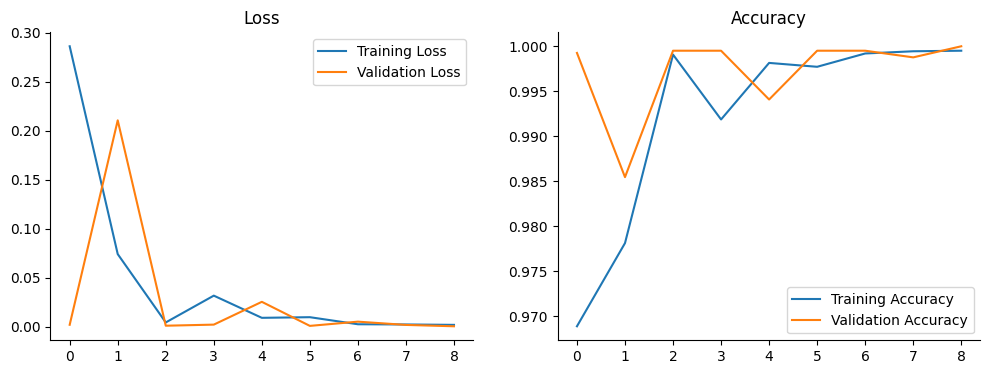

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x=range(len(history.history['loss'])),
             y=history.history['loss'], ax=axes[0],
             label='Training Loss')
sns.lineplot(x=range(len(history.history['val_loss'])),
             y=history.history['val_loss'], ax=axes[0],
             label='Validation Loss')

sns.lineplot(x=range(len(history.history['accuracy'])),
             y=history.history['accuracy'], ax=axes[1],
             label='Training Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])),
             y=history.history['val_accuracy'], ax=axes[1],
             label='Validation Accuracy')
axes[0].set_title('Loss')
axes[1].set_title('Accuracy')

sns.despine()
plt.show()
